In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Load cleaned dataset
file_path = "D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\Data\\processed\\cleaned_student_data.xlsx"
df = pd.read_excel(file_path)

# Select only performance-related features
features = [
    "AWD_Total",
    "WFS_Total",
    ".NET_Total",
    "LOS_Total",
    "NT_Total",
    "CC_Total"
]

X = df[features]

# Check basic info
print("Shape of feature matrix (X):", X.shape)
print("\nFirst 5 rows of X:")
print(X.head())


Shape of feature matrix (X): (8987, 6)

First 5 rows of X:
   AWD_Total  WFS_Total  .NET_Total  LOS_Total  NT_Total  CC_Total
0         67         61          58         58        56        32
1         67         55          60         59        66        40
2         75         57          64         58        65        29
3         69         57          63         63        56        39
4         70         57          61         53        53        31


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(X.isnull().sum())



Missing values in each column:
AWD_Total     0
WFS_Total     0
.NET_Total    0
LOS_Total     0
NT_Total      0
CC_Total      0
dtype: int64


In [7]:
# Create scaler
scaler = StandardScaler()

# Scale the feature matrix
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check result
print("First 5 rows of scaled data:")
print(X_scaled_df.head())


First 5 rows of scaled data:
   AWD_Total  WFS_Total  .NET_Total  LOS_Total  NT_Total  CC_Total
0  -0.070223  -0.678935   -0.573162  -0.459431 -0.612633 -1.253209
1  -0.070223  -1.200037   -0.404512  -0.381634  0.109487  0.002725
2   0.611577  -1.026336   -0.067211  -0.459431  0.037275 -1.724184
3   0.100227  -1.026336   -0.151536  -0.070447 -0.612633 -0.154267
4   0.185452  -1.026336   -0.320186  -0.848414 -0.829269 -1.410201


In [8]:
print("\nMean of scaled features:")
print(X_scaled_df.mean())

print("\nStandard deviation of scaled features:")
print(X_scaled_df.std())



Mean of scaled features:
AWD_Total    -3.194161e-16
WFS_Total    -9.487607e-17
.NET_Total   -4.111297e-16
LOS_Total    -9.013227e-17
NT_Total     -3.099285e-16
CC_Total     -1.644519e-16
dtype: float64

Standard deviation of scaled features:
AWD_Total     1.000056
WFS_Total     1.000056
.NET_Total    1.000056
LOS_Total     1.000056
NT_Total      1.000056
CC_Total      1.000056
dtype: float64


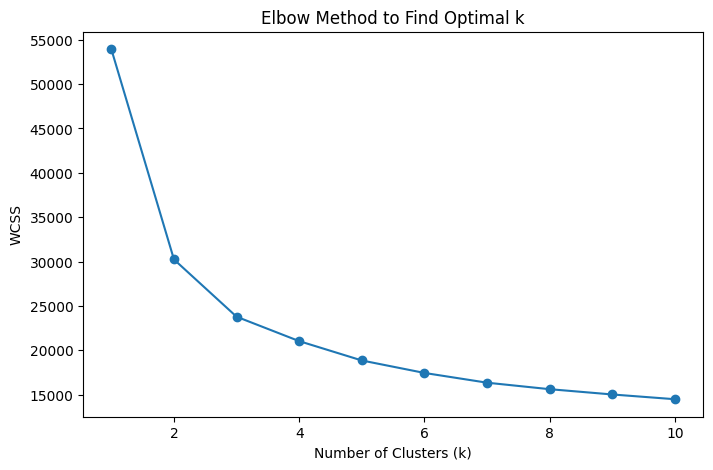

In [10]:
wcss = []  # store WCSS values

# Try k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Find Optimal k")
plt.show()


In [11]:
# Create KMeans model with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit model and predict clusters
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df["Cluster"] = clusters

# Check first few rows
df[["AWD_Total", "WFS_Total", ".NET_Total", "LOS_Total", "NT_Total", "CC_Total", "Cluster"]].head()


,AWD_Total,WFS_Total,.NET_Total,LOS_Total,NT_Total,CC_Total,Cluster
0,67,61,58,58,56,32,0
1,67,55,60,59,66,40,0
2,75,57,64,58,65,29,0
3,69,57,63,63,56,39,0
4,70,57,61,53,53,31,2


In [12]:
# Number of students in each cluster
print(df["Cluster"].value_counts())


Cluster
0    4090
1    2916
2    1981
Name: count, dtype: int64


In [13]:
# Select only feature columns + Cluster
feature_cols = [
    "AWD_Total",
    "WFS_Total",
    ".NET_Total",
    "LOS_Total",
    "NT_Total",
    "CC_Total"
]

# Calculate cluster-wise mean
cluster_summary = df.groupby("Cluster")[feature_cols].mean()

print(cluster_summary)


         AWD_Total  WFS_Total  .NET_Total  LOS_Total   NT_Total   CC_Total
Cluster                                                                   
0        66.643765  68.010269   62.399756  61.716137  63.828362  40.390465
1        79.103567  79.610768   77.056241  77.027435  76.448903  43.377572
2        53.657244  54.595659   51.701161  49.110550  48.224634  34.143362


In [14]:
# Map cluster numbers to performance labels
performance_map = {
    0: "High Performer",
    1: "Average Performer",
    2: "Needs Improvement"
}

df["Performance_Level"] = df["Cluster"].map(performance_map)

df[["Cluster", "Performance_Level"]].head()


,Cluster,Performance_Level
0,0,High Performer
1,0,High Performer
2,0,High Performer
3,0,High Performer
4,2,Needs Improvement


In [16]:
# Reduce data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = df["Cluster"]
pca_df["Performance_Level"] = df["Performance_Level"]

pca_df.head()


,PC1,PC2,Cluster,Performance_Level
0,1.367021,0.922109,0,High Performer
1,0.852952,-0.251390,0,High Performer
2,0.867512,1.569511,0,High Performer
3,0.789342,-0.066223,0,High Performer
4,1.596334,1.047138,2,Needs Improvement


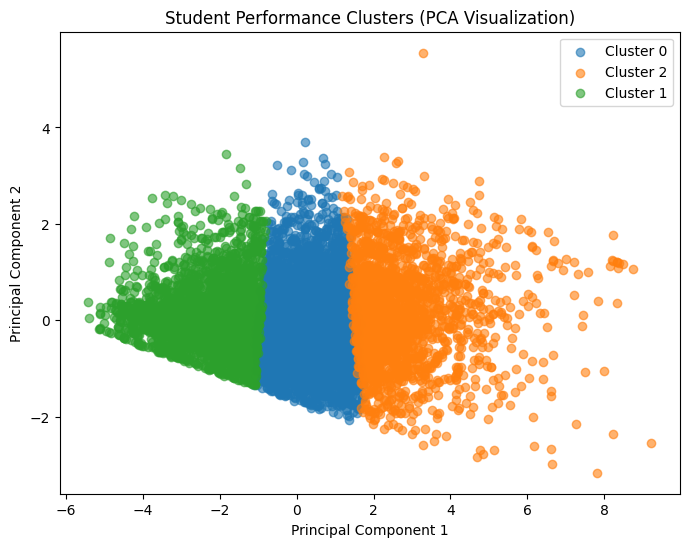

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for cluster in pca_df["Cluster"].unique():
    subset = pca_df[pca_df["Cluster"] == cluster]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=f"Cluster {cluster}",
        alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Student Performance Clusters (PCA Visualization)")
plt.legend()
plt.show()


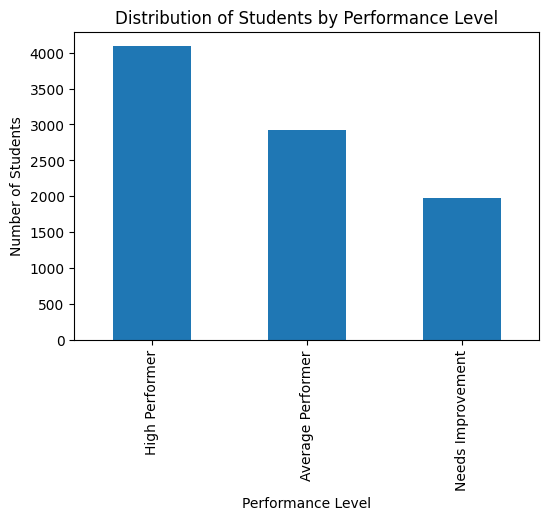

In [18]:
df["Performance_Level"].value_counts().plot(kind="bar", figsize=(6,4))
plt.xlabel("Performance Level")
plt.ylabel("Number of Students")
plt.title("Distribution of Students by Performance Level")
plt.show()


In [19]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", score)


Silhouette Score: 0.266795123711984


In [24]:
import joblib

joblib.dump(kmeans, "D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\models\\kmeans_model.pkl")
joblib.dump(scaler, "D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\models\\scaler.pkl")
joblib.dump(pca, "D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\models\\pca_model.pkl")


['D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\models\\pca_model.pkl']

In [27]:
df.to_excel(
    "D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\outputs\\final_student_clustered_data.xlsx",
    index=False
)
cluster_summary.to_csv(
    "D:\\VNSGU_PDA_DATA\\Data-Analytics-using-Python-Minor-Project\\outputs\\cluster_summary.csv"
)

